In [8]:
import os, sys
import json
import random
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

module_path = os.path.abspath(os.path.join("..", ".."))
sys.path.append(module_path)
from dataset_utils.config import DS_ROOT
from dataset_utils.utils import imshow_by_path, imshow_by_name

from dataset_utils.Dataset import Dataset
from dataset_utils.utils import extract_eyes_region_from_aligned_face, gray, eqhist

import data_provider

In [9]:
ANT_PATH = "./flmk_annotation.json"
DATA_DIR = os.path.join(DS_ROOT, "aligned_with_68")
with open(ANT_PATH, "r") as fr:
    ant = json.load(fr)

blinks = []
for name, label in sorted(ant.items()):
    if label == "blink":
        blinks.append(name)


0001_0_A_00_00000060.jpg


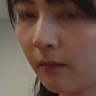

0001_0_A_00_00000125.jpg


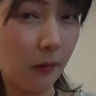

0001_0_A_01_00000145.jpg


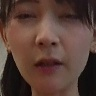

0001_0_A_03_00000045.jpg


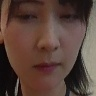

0001_0_A_03_00000185.jpg


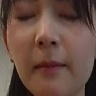

0001_0_A_04_00000025.jpg


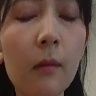

0001_0_A_04_00000185.jpg


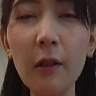

0002_0_A_00_00000045.jpg


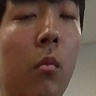

0002_0_A_01_00000245.jpg


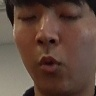

0002_0_A_05_00000255.jpg


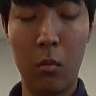

0002_0_A_07_00000175.jpg


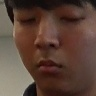

0002_0_A_11_00000015.jpg


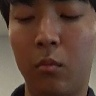

0002_0_A_12_00000250.jpg


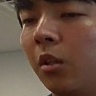

0002_0_A_12_00000255.jpg


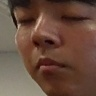

0002_0_A_21_00000155.jpg


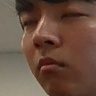

0002_0_A_31_00000105.jpg


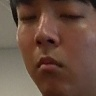

0002_0_D_00_00000265.jpg


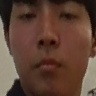

0002_0_D_02_00000055.jpg


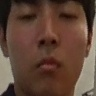

0002_0_D_02_00000140.jpg


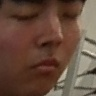

0002_0_D_02_00000220.jpg


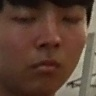

0002_0_D_04_00000135.jpg


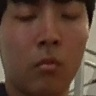

0002_0_D_04_00000250.jpg


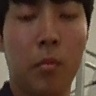

0002_0_D_06_00000025.jpg


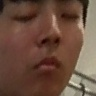

0002_0_D_06_00000165.jpg


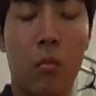

0002_0_D_06_00000170.jpg


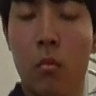

0002_0_D_06_00000215.jpg


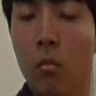

0002_0_D_08_00000245.jpg


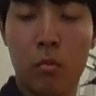

0002_0_D_10_00000125.jpg


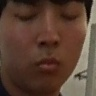

0002_0_D_10_00000210.jpg


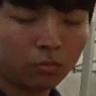

0002_0_D_11_00000105.jpg


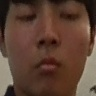

0002_0_D_12_00000005.jpg


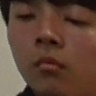

0002_0_D_12_00000010.jpg


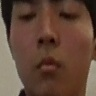

0002_0_D_12_00000015.jpg


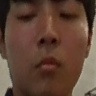

0002_0_D_12_00000020.jpg


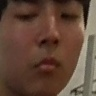

0002_0_D_12_00000035.jpg


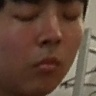

0002_0_D_12_00000220.jpg


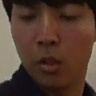

0002_0_D_13_00000010.jpg


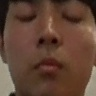

0002_0_D_13_00000065.jpg


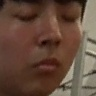

0002_0_D_15_00000115.jpg


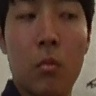

0002_0_D_15_00000275.jpg


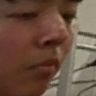

0002_0_D_32_00000010.jpg


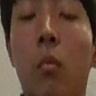

0002_0_D_32_00000015.jpg


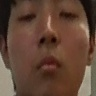

0002_0_D_32_00000120.jpg


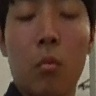

0002_0_D_32_00000200.jpg


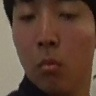

0002_0_D_40_00000190.jpg


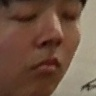

0003_0_B_03_00000005.jpg


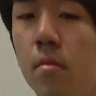

0003_0_C_11_00000005.jpg


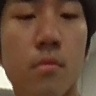

0004_0_B_04_00000020.jpg


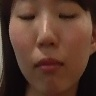

0004_0_B_09_00000025.jpg


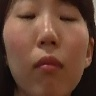

0004_0_B_09_00000040.jpg


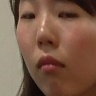

0004_0_C_00_00000050.jpg


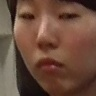

0004_0_C_07_00000035.jpg


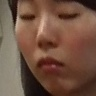

0005_1_D_09_00000050.jpg
can't show: 0005_1_D_09_00000050.jpg
0006_0_B_10_00000045.jpg


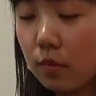

0006_0_B_11_00000040.jpg


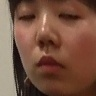

0006_0_B_50_00000035.jpg


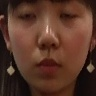

0006_0_C_16_00000030.jpg


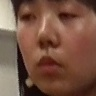

0006_0_C_17_00000015.jpg


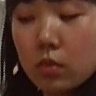

0006_0_C_50_00000045.jpg


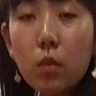

0007_0_D_12_00000040.jpg


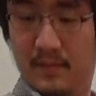

0007_0_D_50_00000040.jpg


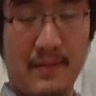

0008_0_C_01_00000025.jpg


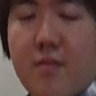

0008_0_C_03_00000050.jpg


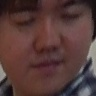

0008_0_C_08_00000040.jpg


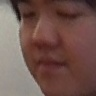

0008_0_C_16_00000020.jpg


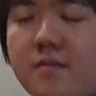

0008_0_C_18_00000020.jpg


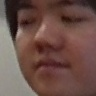

0008_0_C_18_00000025.jpg


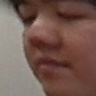

0011_0_D_11_00000020.jpg


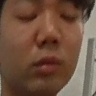

0012_0_D_18_00000030.jpg


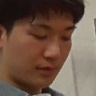

0012_0_D_50_00000010.jpg


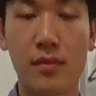

0013_0_C_00_00000015.jpg


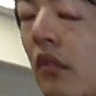

0013_0_C_03_00000005.jpg


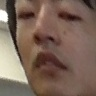

0013_1_B_03_00000045.jpg


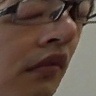

0014_0_A_03_00000025.jpg


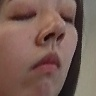

0014_0_A_03_00000040.jpg


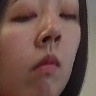

0014_0_A_04_00000040.jpg


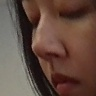

0014_0_A_05_00000010.jpg


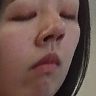

0014_0_A_05_00000030.jpg


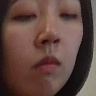

0014_0_A_11_00000010.jpg


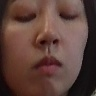

0014_0_A_16_00000025.jpg


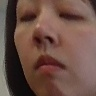

0014_0_D_13_00000050.jpg


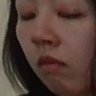

0014_0_D_18_00000025.jpg


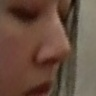

0014_0_D_32_00000045.jpg


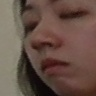

0016_0_D_03_00000025.jpg


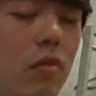

0016_0_D_06_00000020.jpg


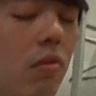

0017_0_C_03_00000030.jpg


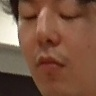

0017_0_C_09_00000050.jpg


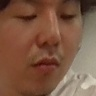

0017_0_C_10_00000045.jpg


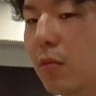

In [12]:
for b in blinks:
    try:
        print(b)
        imshow_by_name(b)
    except:
        print("can't show: %s" % b)

In [7]:
label_count = {"big_gap":0, "small_gap":0, "one_eye":0, "blink": 0, "other": 0, "ok": 0}
for key, value in ant.items():
    label_count[value] += 1
label_count

{'big_gap': 593,
 'blink': 88,
 'ok': 4,
 'one_eye': 172,
 'other': 31,
 'small_gap': 213}